# Tarea 1 de Física computacional
## Aquino Chapa Martha Abril
### Hecho en Python

In [1]:
from pylab import *
import random
from numpy import array
from numpy import *
import math

## 1. Realice y explique los desarrollos necesarios para obtener los siguientes algoritmos:
#### (a) Encuentre una expresión para la segunda derivada numérica de orden 4 con malla uniforme. (Se desprecian téminos $h^{5}$ en la serie de Taylor)


Iniciamos expandiendo en serie de Taylor la función f en 4 diferentes puntos alrededor de $x_0$

$$
f(x_0+h)=f(x_0) + f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 + \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-h)=f(x_0) - f^{(1)}(x_0)h + \frac{f^{(2)}(x_0)}{2!}h^2 - \frac{f^{(3)}(x_0)}{3!}h^3 + \frac{f^{(4)}(x_0)}{4!}h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0+2h)=f(x_0) + 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
$$
f(x_0-2h)=f(x_0) - 2f^{(1)}(x_0)h + 2f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(3)}(x_0)h^3 + \frac{2}{3}f^{(4)}(x_0)h^4 + \mathcal{O}(h^5)
$$
Debido a que queremos queremos la segunda derivada de orden cuatro despreciamos los términos de orden $h^5$, sumamos la primera y segunda expresión así como la tercera y cuarta expresión. Con lo que obtenemos las siguientes dos ecuaciones:

$$
f(x_0+h)+f(x_0-h)=2f(x_0)+f^{(2)}(x_0)h^2 + \frac{1}{12}f^{(4)}(x_0)h^4
$$
$$
f(x_0+2h)+f(x_0-2h)=2f(x_0)+4f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$

Ahora mutiplicamos la primera de estas igualdades por $16$ y la segundad igualdad por $-1$ y obtenemos el siguiente sistema de ecuaciones:
$$
16f(x_0+h)+16f(x_0-h)=32f(x_0) + 16f^{(2)}(x_0)h^2 + \frac{4}{3}f^{(4)}(x_0)h^4
$$
$$
-f(x_0+2h)-f(x_0-2h)=-2f(x_0)-4f^{(2)}(x_0)h^2 - \frac{4}{3}f^{(4)}(x_0)h^4
$$
Al sumar las dos ecuaciones anteriores se obtiene: 
$$
16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h)=30f(x_0)+12f^{(2)}(x_0)h^2
$$

Por lo que tenemos la expresión para la segunda derivada de orden cuatro:

$$
f^{(2)}(x_0) = \frac{16f(x_0+h)+16f(x_0-h)-f(x_0+2h)-f(x_0-2h) - 30f(x_0)}{12h^2}
$$
Donde se ha tomado $h=[x+i]-h[i]$, por lo cual hay que notar que la expresión anterior hace uso del hecho de que se tienen puntos a la derecha y a la izquiera de $x_0$, por lo cual la expresión anterior no se vale en los puntos frontera. Entonces obtengamos la derivada en los puntos frontera. 

Para esto, usaremos los h, 2h, 3h, 4h es decir nos estamos tomando los puntos a la derecha.
Realizando las expansiones en serie de Taylor correspondiente, despresiando terminos $h^{5}$, se obtiene:

$$f(x_0+h)=f(x_0)+hf^{(1)}(x_0)+{\frac{1}{2}}f^{(2)}(x_0)h^{2}+\frac{f^{(3)}(x_0)}{3!}h^{3}+{\frac{f^{(4)}}{4!}}h^{4}   $$


$$f(x_0+2h)=f(x_0)+2hf^{(1)}(x_0)+{\frac{4}{2}}f^{(2)}(x_0)h^{2}+\frac{8f^{(3)}(x_0)}{3!}h^{3}+{16\frac{f^{(4)}}{4!}}h^{4}   $$

$$f(x_0+3h)=f(x_0)+3hf^{(1)}(x_0)+{\frac{9}{2}}f^{(2)}(x_0)h^{2}+\frac{27f^{(3)}(x_0)}{3!}h^{3}+{81\frac{f^{(4)}}{4!}}h^{4}   $$

$$f(x_0+4h)=f(x_0)+4hf^{(1)}(x_0)+{\frac{16}{2}}f^{(2)}(x_0)h^{2}+\frac{64f^{(3)}(x_0)}{3!}h^{3}+{256\frac{f^{(4)}}{4!}}h^{4}   $$

Es posible ver el sistema anterior como la siguiente matriz:
$$
\begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{6} & \frac{1}{24} \\
2 & 2 & \frac{4}{3} & \frac{2}{3} \\
3 & \frac{9}{2} & \frac{9}{2} & \frac{27}{8} \\
4 & 8 & \frac{32}{3} & \frac{32}{3}
\end{bmatrix}
\begin{bmatrix}
hf_i' \\
h^2f_i'' \\
h^3f_i''' \\
h^4f_i''''
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i \\
f_{i+3}-f_i \\
f_{i+4}-f_i 
\end{bmatrix}
$$
Cuya solución para la segunda derivada es:

$$f^{(2)}(x_0)={\frac{-104(f_{i+1}-f_i)+114(f_{i+2}-f_i)-56(f_{i+3}-f_i)+11(f_{i+4}-f_i)}{12h^{2}}}  $$
Lo cual se puede reducir a lo siguiente:

$$f^{(2)}(x_0)={\frac{-104f_{i+1}+114f_{i+2}-56f_{i+3}+11f_{i+4}+35f_i)}{12h^{2}}}  $$
Esta ecuación es para la frontera izquiera, para la frontera derecha basta hacer los siguientes cambios $i+1\rightarrow i-1$, $i+2\rightarrow i-2$, $i+3\rightarrow i-3$, $i+4\rightarrow i-4$, así como utilizarda i=N

##### (b) Encuentre una expresión para la derivada numérica de 2o orden para una malla no uniforme. (Se desprecian términos $h^{3}$ en la serie de Taylor)
Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces los siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$
f(x_0-h_1)=f(x_0)-f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Multiplicamos por $h_2^{2}$ la primera ecuación y por $h_1^{2}$ la segunda y las restamos las ecuaciones anteriores se obtiene:


$$ h_2^{2}f(x_0-h_1)=h_2^{2}f(x_0)-h_2^{2}f^{(1)}(x_0)h_1+{\frac{1}{2}}f^{(2)}(x_0)h_1^{2}h_2^{2}+\mathcal{O}(h^{3})  $$

$$
h_1^{2}f(x_0+h_2)=h_1^{2}f(x_0)+h_1^{2}f^{(1)}(x_0)h_2 + h_1^{2}\frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$

Restando las dos ecuaciones anteriores y despreciando los terminos al cubo
$$h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)=f(x_0)(h_1^{2}-h_2^{2})+f^{(1)}(x_0)(h_2^{2}h_1+h_2h_1^{2}) $$

Por lo cual se obtiene que la segunda derivada de 2do orden, en los puntos que no están en la frontera está dados por:
$$ f^{(1)}(x_0)={\frac{h_1^{2}f(x_0+h_2)-h_2^{2}f(x_0-h_1)-f(x_0)(h_1^{2}-h_2^{2})}{h_2^{2}h_1+h_2h_1^{2}}} $$
Obteniendo ahora la derivada para los puntos frontera, inciemos con la frontera derecha, por lo cual tomaremos h1=x1-x0, h2=x2-x0.
Realizamos la expansión en serie de Taylor:

$$
f(x_0+h_1)=f(x_0)+f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Despreciando los terminos al cubo y situando el sistema anterior como un sistema matricial obtenemos que:

$$
\begin{bmatrix}
h1 & \frac{h1^{2}}{2}\\ 
h2& \frac{h2^{2}}{2} \\
\end{bmatrix}
\begin{bmatrix}
f_i' \\
f_i'' 
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i 
\end{bmatrix}
$$

El cual al resolver para f' se obtiene :
$$f'(x_0)=\frac{-(f_{i+2}-f_i)h_1^{2}+h_2^{2}(f_{i+1}-f_i)}{h_1h_2^{2}-h_1^{2}h_2}    $$

Lo que podemos reducir a:
$$f'(x_0)=\frac{-h_1^{2}f_{i+2}+h_2^{2}f_{i+1}+f_i(-h_2^{2}+h_1^{2})}{h_1h_2^{2}-h_1^{2}h_2}   $$
Esta ecuación es para la frontera izquiera, para la frontera derecha basta hacer los siguientes cambios $i+1\rightarrow i-1$, $i+2\rightarrow i-2$ así como utilizarda i=N

In [5]:
## Ya está bien definida :D probada como sinx,cosx,e^(x^2)
#Definimos la funcion para la primera derivada en un malla no uniforme
def deriv_1(f,x):
    f_prima = zeros(len(f))
    for i in range (1,len(f)-1):
        f_prima[i]=(((x[i]-x[i-1])**2)*(f[i+1])-((x[i+1]-x[i])**2)*f[i-1]-f[i]*((x[i]-x[i-1])**2-(x[i+1]-x[i])**2))/((x[i+1]-x[i])**2*(x[i]-x[i-1])+(x[i]-x[i-1])**2*(x[i]-x[i-1]))
    #Obtenemos la derivada en la frontera:
        h1=x[1]-x[0]
        h2=x[2]-x[0]
        
        h11=(x[-1]-x[-2])
        h22=(x[-1]-x[-3])
        ## Iniciamos con la frontera izquierda
        f_prima[0]=(-h1**2*f[2]+h2**2*f[1]+f[0]*(-h2**2+h1**2))/(h1*h2**2-h1**2*h2)
        #Ahora obtenemos con la frontera derecha
        f_prima[-1]=((+h11**2*f[-3])-h22**2*f[-2]+f[-1]*(+h22**2-h1**2))/(h11*h22**2-h11**2*h22)
    return f_prima

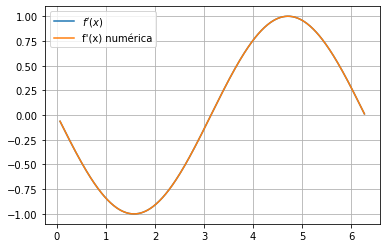

In [6]:
#Definimos una función que nos modificará una malla uniforme
def f(x):
    return x

#Definimos la malla uniforme con 500 puntos y se le aplica la funcion
x = 2*np.pi*f(np.linspace(0.01, 1, 500, endpoint=False))
#Definimos la función a la que le aplicaremos la derivida
y = cos(x)
#Definimos la primera derivada analítica
y_deriv = -sin(x)
#Definimos la primera derivada númerica
y_deriv_1_num = deriv_1(y,x)

#Las graficamos para comparar las primera derivadas y revisar que el código funciona adecuadamente
plot(x,y_deriv,label="$f'(x)$")
plot(x,y_deriv_1_num,label="f'(x) numérica")
legend(),grid()
show()
##Se aprecia que la derivada analítica se acopla a la derivada númerica

##### (c) Encuentre una expresión para la segunda derivada numérica de 2o orden con malla no uniforme. (Se desprecian términos $h^{3}$  en la serie de Taylor)

Debido a que queremos la derivada en una malla no uniforme, tendremos dos valores de h, h1 para el lado izquierdo y h2 para el lado derecho, además despreciaremos términos $h^{3}$, consideremos entonces los siguientes expansiones en serie de Taylor alrededor de un punto $x_0$:
$$ f(x0-h_1)=f(x_0)-f^{(1)}(x_0)h_1+{1/2}f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$
$$ f(x0+h_2)=f(x_0)+f^{(1)}(x_0)h_2+{1/2}f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

Multiplicando por $h_1$ y por $h_2$ la segunda y la primera ecuación se obtiene que:

$$ h_2f(x0-h_1)=h_2f(x_0)-h_2f^{(1)}(x_0)h_1+{1/2}h_2f^{(2)}(x_0)h_1^{2}+\mathcal{O}(h_1^{3})  $$
$$ h_1f(x0+h_2)=h_1f(x_0)+h_1f^{(1)}(x_0)h_2+{1/2}h_1f^{(2)}(x_0)h_2^{2}+\mathcal{O}(h_2^{3})  $$

Sumando las ecuaciones anteriores y despreciando terminos al cubo:
$$h_2f(x_0-h_1)+h_1f(x_0+h_2)=f(x_0)(h_2+h_1)+{\frac{1}{2}}f^{(2)}(x_0)(h_2h_1^{2}+h_1h_2^{2}) $$

$$ f^{(2)}(x_0)=2*\frac{h_2f(x_0-h_1)+h_1f(x_0+h_2)-f(x_0)(h_2+h_1)}{(h_2h_1^{2}+h_1h_2^{2})} $$

Obteniendo ahora la derivada para los puntos frontera, inciemos con la frontera derecha, por lo cual tomaremos h1=x1-x0, h2=x2-x0.
Realizamos la expansión en serie de Taylor:
$$
f(x_0+h_1)=f(x_0)+f^{(1)}(x_0)h_1 + \frac{1}{2}f^{(2)}(x_0)h_1^2 + \mathcal{O}(h^3)
$$

$$
f(x_0+h_2)=f(x_0)+f^{(1)}(x_0)h_2 + \frac{1}{2}f^{(2)}(x_0)h_2^2 + \mathcal{O}(h^3)
$$
Despreciando los terminos al cubo y situando el sistema anterior como un sistema matricial obtenemos que:
$$
\begin{bmatrix}
h1 & \frac{h1^{2}}{2}\\ 
h2& \frac{h2^{2}}{2} \\
\end{bmatrix}
\begin{bmatrix}
f_i' \\
f_i'' 
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i 
\end{bmatrix}
$$

Al resolver el sistema anterior para f'' se obtiene:
$$f''(x_0)= 2*{\frac{(f_{i+2}-f_i)*h_1-(f_{i+1}-f_i)h_2}{h_1h_2^{2}-h_1^{2}h_2}}  $$

$$f''(x_0)=2*{\frac{f_{i+2}h_1-h_2f_{i+1}+f_i(h_2-h_1)}{h_1h_2^{2}-h_1^{2}h_2}}  $$
Esta ecuación es para la frontera izquiera, para la frontera derecha basta hacer los siguientes cambios  𝑖+1→𝑖−1 ,  𝑖+2→𝑖−2 ,  𝑖+3→𝑖−3 ,  𝑖+4→𝑖−4 , así como utilizarda i=N

## 2. Utilizando las funciones anteriores calcule el tiempo promedio para una malla con 500 puntos en cadauno de los algoritmos anteriores. De una explicación de las ventajas y desventajas de cada una las funciones antes mencionadas.

### Iniciamos obteniendo el tiempo con una malla uniforme y con la función segunda derivada de orden 4:

In [ ]:
##Definimos la primera derivada de orden 4 para una función f y cuya malla es uniforme.
def deriv_1(f,x):
    f_prima1 = zeros(len(f))
    h=x[1]-x[0]
    for i in range (2,len(f)-2):
        f_prima1[i]=(16*f[i+1]+16*f[i-1]-f[i+2]-f[i-2]-30*f[i])/(12*h*h)
    # calcular los puntos frontera izquierda
        f_prima1[0] = (-(26/3)*f[1]+(19/2)*f[2]-(14/3)*f[3]+(11/12)*f[4]+(35/12)*f[0])/(h*h)
        f_prima1[1] = (-(26/3)*f[2]+(19/2)*f[3]-(14/3)*f[4]+(11/12)*f[5]+(35/12)*f[1])/(h*h)
        
    ##calculo para los dos últimos puntos
    ## Falta checar las derivadas en la frontera izquierda
        #f_prima1[-1] = (-(26/3)*f[-2]+(19/2)*f[-3]-(14/3)*f[-4]+(11/2)*f[-5]+(35/12)*f[-1])/(h*h)
        f_prima1[-2] = (-(26/3)*f[-3]+(19/2)*f[-4]-(14/3)*f[-5]+(11/12)*f*[-6]+(35/12)*f[-2])/(h*h)
    return f_prima1

In [ ]:
###Escogemos la malla uniforme
x1 = linspace(0,2*pi,500)
#Escogemos la función de prueba
y1 = sin(x1)
y_deriv1 = -sin(x1)
y_num_deriv1 = deriv_1(y1,x1)
#Graficamos para corroborar que la derivada numerica corresponda con la derivinada analítica
plot(x1,y_deriv1,label="$f'(x)$")
plot(x1,y_num_deriv1,label="f'(x) numérica")
legend(),grid()
show()
#y_h3 = deriv_h3(y,x)
#y_h5 = deriv_h5(y,x)
#print("Error con h3 =" , max(abs(y_num_deriv1-y_deriv1)) )

In [ ]:
## Obtenemos el tiempo
#Obtenemos el tiempo de la función 
## %timeit (deriv1(y,x))

### Obteniendo el tiempo con una malla no uniforme y con la función primera derivada de orden 2:


In [ ]:
#Obtenemos el tiempo de la función 
%timeit (deriv_1(y,x))

### Obteniendo el tiempo con una malla no unfirme y con la función segunda derivada de orden 2:

In [ ]:
### Lista, proboda con x**3, sinx, cosx, sin2x :D 
##Definimos la funcion segunda derivada para una función f y cuya malla no es uniforme.
def deriv_2(f,x):
    f_prima2 = zeros(len(f))

    for i in range (1,len(f)-1):
        h1=x[i]-x[i-1]
        h2=x[i+1]-x[i]
        f_prima2[i]=(2/(h2*h1**2+h1*h2**2))*(h2*f[i-1]+h1*f[i+1]-f[i]*(h2+h1))
    # Obteniendo la derivada en las fronteras
    #frontera izquierda
        h11=x[1]-x[0]
        h22=x[2]-x[0]
    ##revisar esta frontera
        
        f_prima2[0]=(2/(h11*h22**2-h11**2*h22))*(f[2]*h11-h22*f[1]+f[0]*(h22-h11))
        
     #frontera derecha
        h111=x[-1]-x[-2]
        h222=x[-1]-x[-3]
        f_prima2[-1]=(2/(h111*h222*h222-h111**2*h222))*(f[-3]*h111-h222*f[-2]+f[-1]*(h222-h111))
        
    return f_prima2

##Definimos una función f para transformar cualquier malla uniforme a una no uniforme.
def f(x):
    return x
###Escogemos la malla
x = f(np.linspace(0, 10, 500) )
##Escogemos la funcion f a la cual le aplicaremos la primera derivada
y = sin(2*x)
y_deriv2 = -4*sin(2*x)
y_num_deriv_2 = deriv_2(y,x)
#plot(x,y,label="$f(x)$")
plot(x,y_deriv2,label="$f'(x)$")
plot(x,y_num_deriv_2,label="f'(x) numérica")
legend(),grid()
show()

In [ ]:
#Obtenemos el tiempo de la función 
%timeit (deriv_2(y,x))

### 3. Calcule la derivada analítica de las funciones $f(x) = e^{−x^{2}} sin(10x)$ con $x \in [−5, 5]$ , y $g(x)=-\frac{2}{x^{6}}+{\frac{1}{x^{12}}}$ con $x \in [0.5, 5]$. Realice las gráficas de las funciones y sus primeras dos derivadas. Con las funciones del problema 1, encuentre una malla adecuada para cada caso en el que el error de cálculo sea menor que $10−5$ para cualquier punto. ¿Las mallas tienen el mismo espacio entre puntos de la malla?, explique porque si o porque no.

Iniciemos obtiendo las derivadas analíticas:
$$f'(x)=2e^{-x^{2}}(5\cos(10x)-x\sin(10x) $$
$$f^{(2)}=e^{-x^{2}}(2(2x^{2}-51)\sin(10x)-40x\cos(10x))$$
Por otro lado::
$$g'(x)={\frac{12}{x^{-7}}}-{\frac{12}{x^{13}}} $$ 

$$g''(x)=-\frac{84}{x^{-8}}+\frac{156}{x^{-14}}  $$

In [ ]:
#graficando la primera función de -5 a 5
#x1=linspace(-5,-3.5,400)
#x2=linspace(-3.5000001,-2.5,400)
#x3=linspace(-2.5000001,2,400)

x5=linspace(-5,5,5)
x=x5**2
#def malla (N=100):
    #x4=linspace(2+0.0000000001,2+0.0000000002,400)
    #for i in range (3,N):
   #      x4 += linspace(2+0.0000000001*i,2+0.0000000001*(1*+i),400)  
  #  return x4
#x=x1+x2+x3+x4

y=exp(-(x**2))*sin(10*x)
## La derivada analitica
yprima=2*exp(-(x*x))*(5*cos(10*x)-x*sin(10*x))

yprima2=exp(-(x*x))*(((2*x*x-102)*sin(10*x))-(40*x*cos(10*x)))
yprima2_num=deriv_2(y,x)

#plot(x,y,label="f(x)")
plot(x,yprima2,label="f'(x)")
plot(x,yprima2_num,label="f'(x)")
legend(),grid()
show()
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima2-yprima2_num)) )

In [ ]:
#graficando la segunda funcion
x=linspace(0.5,5,8)
#x2=linspace(0.500001,0.500002,500)
#x3=linspace(1,5,50)
x1=x#=np.concatenate((x, x2), axis=0)
#print(x1)
#y1=(-2/(x**6))+(1/x**12)

y=(12/(x1**7))-(12/x1**13)
yprima2=(-84/(x1**(-8)))+(156*(x1**(-14)))
yprima2_num=deriv_2(y,x1)
plot(x1,yprima2,label="f'(x)")
plot(x1,yprima2_num,label="f'(x) númerica")
legend(),grid()
show()
print("Error de la segunda derivada no uniforme =" ,
      max(abs(yprima2-yprima2_num)) )

### 4. Suponga que tiene la función $sinc(x) =\frac{ sin(3x)}{x}$ en el intervalo$ [−2π, 2π]$. Calcule la derivada analítica de dicha función y calcule la derivada numérica utilizando una malla uniforme.

### (a) Dependiendo del lenguaje de programación que utilice, averig\"e la manera de obtener los tiempos de ejecución para calcular la derivada utilizando los algoritmos de 2o y 4o orden.

### (b) Comparando con la solución analítica, encuentre el espacio entre los puntos de la malla para que el error máximo en el cálculo sea menor a $10^{-5}$ para cada algoritmo.

### (c) Realice la gráfica del “Número de puntos en el espaciamiento de la malla” vs “Tiempo de ejecución” partiendo de un espaciamiento en los puntos en la malla de 0.25 hasta el espaciamiento encontrado en el inciso b). Por o menos considere 15 puntos, es decir 15 mallas deferentes, para realizar este ejercicio.

### (d) ¿Qué puede concluir de este experimento numérico?

In [ ]:
M=(m1,m2)
#print(M)

In [ ]:
m1 = []
for m in range(1,100):
    m1.append(2*pi/m)
m1.sort()
#print (m1)
m2 = []
for n in range(9802,10202):
    m2.append(n)
m2.sort()
#print(m2)